In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report,confusion_matrix


In [3]:
# Load the data
df = pd.read_csv('Salary_prediction_data.csv')
df

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus,salary
0,0,1,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced,0
1,1,2,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed,1000000
2,2,3,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced,0
3,3,4,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed,950000
4,4,5,8.3,1,2,2,8,4.5,Yes,Yes,74,88,0,Placed,950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,7.5,1,1,2,7,3.9,Yes,No,85,66,4,NotPlaced,0
9996,9996,9997,7.4,0,1,0,9,4.8,No,No,84,67,1,Placed,750000
9997,9997,9998,8.4,1,3,0,7,4.8,Yes,Yes,79,81,0,Placed,550000
9998,9998,9999,8.9,0,3,2,8,4.8,Yes,Yes,71,85,0,Placed,900000


In [4]:
df.head(10)

,Unnamed: 0,StudentId,CGPA,Major Projects,Workshops/Certificatios,Mini Projects,Skills,Communication Skill Rating,Internship,Hackathon,12th Percentage,10th Percentage,backlogs,PlacementStatus,salary
0,0,1,7.5,1,1,1,6,4.4,No,No,61,79,2,NotPlaced,0
1,1,2,8.9,0,3,2,9,4.0,Yes,Yes,78,82,0,Placed,1000000
2,2,3,7.3,1,2,2,8,4.8,Yes,No,79,80,2,NotPlaced,0
3,3,4,7.5,1,1,2,8,4.4,Yes,Yes,81,80,0,Placed,950000
4,4,5,8.3,1,2,2,8,4.5,Yes,Yes,74,88,0,Placed,950000
5,5,6,7.0,0,2,2,7,4.2,Yes,No,55,66,4,NotPlaced,0
6,6,7,7.7,1,1,1,7,4.0,No,No,62,65,4,NotPlaced,0
7,7,8,7.7,2,1,0,8,3.5,Yes,Yes,59,72,3,NotPlaced,0
8,8,9,6.5,1,1,0,8,3.9,No,Yes,75,71,2,NotPlaced,0
9,9,10,7.8,1,3,2,7,4.4,Yes,Yes,85,86,0,Placed,450000


In [5]:
# Basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10000 non-null  int64  
 1   StudentId                   10000 non-null  int64  
 2   CGPA                        10000 non-null  float64
 3   Major Projects              10000 non-null  int64  
 4   Workshops/Certificatios     10000 non-null  int64  
 5   Mini Projects               10000 non-null  int64  
 6   Skills                      10000 non-null  int64  
 7   Communication Skill Rating  10000 non-null  float64
 8   Internship                  10000 non-null  object 
 9   Hackathon                   10000 non-null  object 
 10  12th Percentage             10000 non-null  int64  
 11  10th Percentage             10000 non-null  int64  
 12  backlogs                    10000 non-null  int64  
 13  PlacementStatus             1000

In [6]:
print(df.describe())


        Unnamed: 0    StudentId          CGPA  Major Projects  \
count  10000.00000  10000.00000  10000.000000    10000.000000   
mean    4999.50000   5000.50000      7.698010        1.049200   
std     2886.89568   2886.89568      0.640131        0.665901   
min        0.00000      1.00000      6.500000        0.000000   
25%     2499.75000   2500.75000      7.400000        1.000000   
50%     4999.50000   5000.50000      7.700000        1.000000   
75%     7499.25000   7500.25000      8.200000        1.000000   
max     9999.00000  10000.00000      9.100000        2.000000   

       Workshops/Certificatios  Mini Projects        Skills  \
count             10000.000000   10000.000000  10000.000000   
mean                  2.026600       1.013200      7.555200   
std                   0.867968       0.904272      0.927922   
min                   0.000000       0.000000      6.000000   
25%                   1.000000       0.000000      7.000000   
50%                   2.000000      

In [7]:

# Check for missing values
print(df.isnull().sum())


Unnamed: 0                    0
StudentId                     0
CGPA                          0
Major Projects                0
Workshops/Certificatios       0
Mini Projects                 0
Skills                        0
Communication Skill Rating    0
Internship                    0
Hackathon                     0
12th Percentage               0
10th Percentage               0
backlogs                      0
PlacementStatus               0
salary                        0
dtype: int64


In [8]:
# Drop unnecessary columns
df.drop(['Unnamed: 0', 'StudentId'], axis=1, inplace=True)

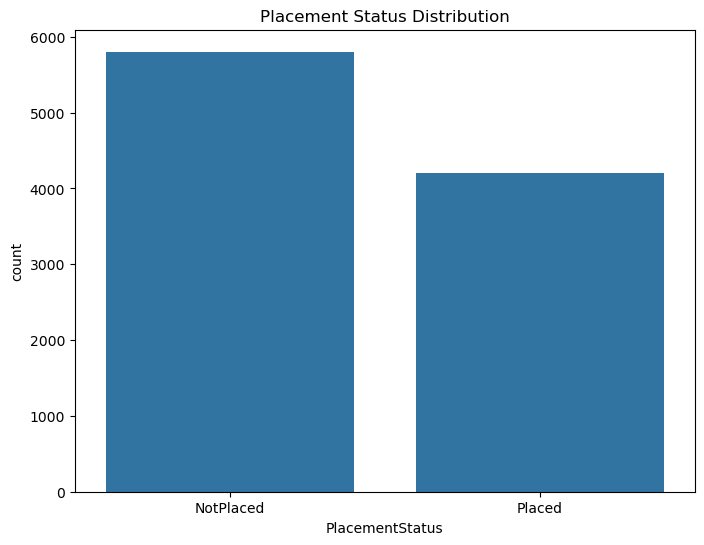

In [9]:

# Visualizations
# Placement status distribution
plt.figure(figsize=(8,6))
sns.countplot(x='PlacementStatus', data=df)
plt.title('Placement Status Distribution')
plt.show()



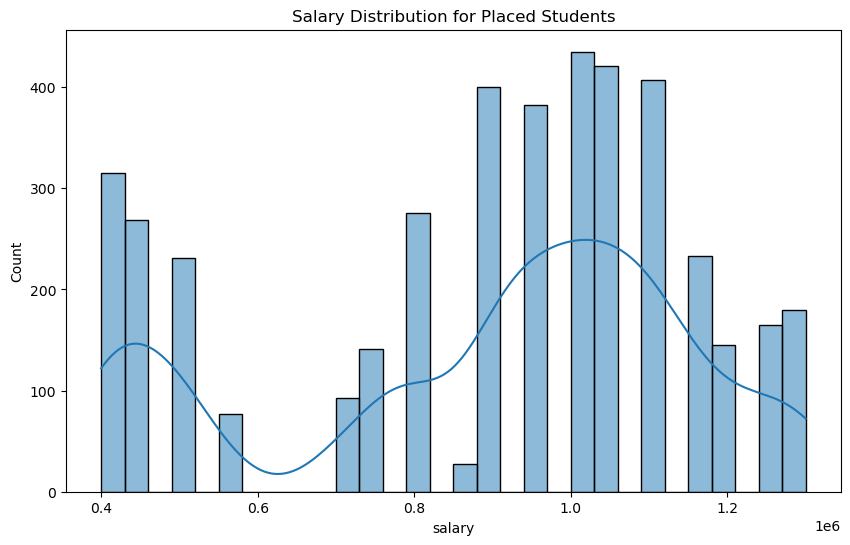

In [10]:
# Salary distribution for placed students
placed = df[df['PlacementStatus'] == 'Placed']
plt.figure(figsize=(10,6))
sns.histplot(placed['salary'], bins=30, kde=True)
plt.title('Salary Distribution for Placed Students')
plt.show()


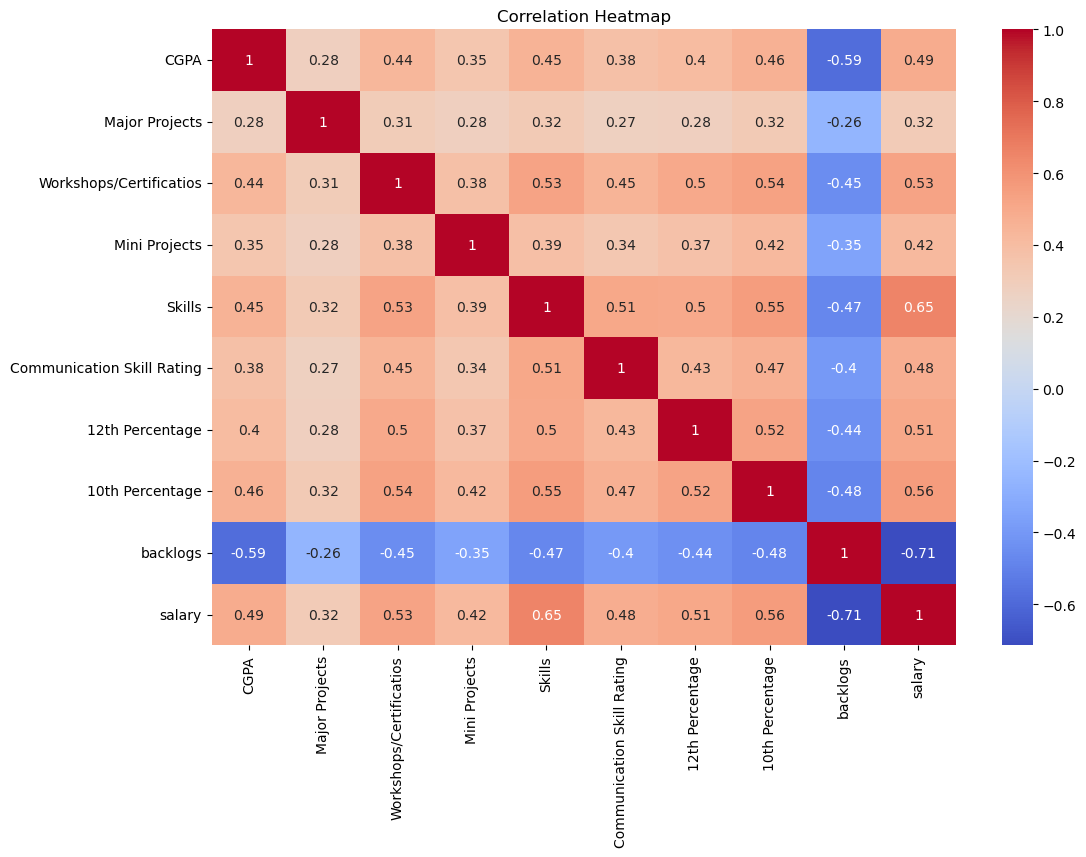

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


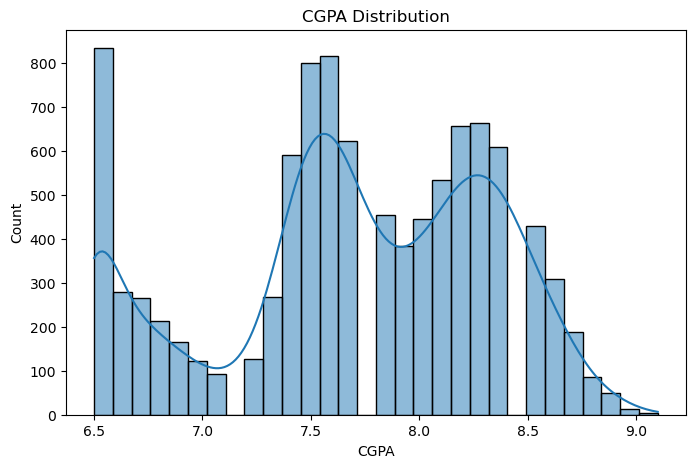

In [12]:
# CGPA distribution
plt.figure(figsize=(8,5))
sns.histplot(df['CGPA'], kde=True, bins=30)
plt.title("CGPA Distribution")
plt.show()

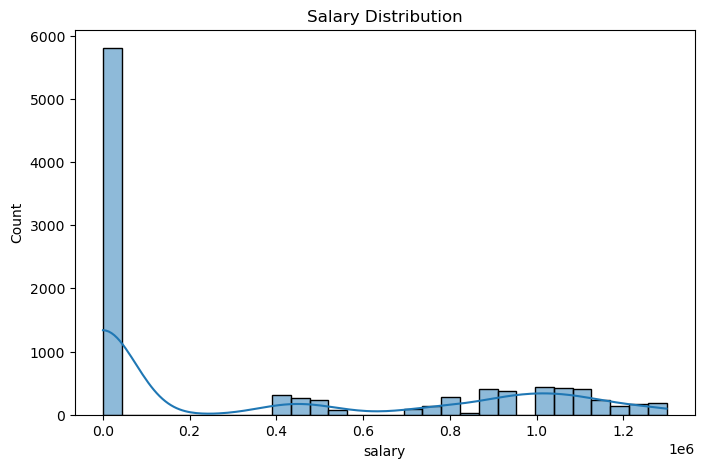

In [13]:
# Salary distribution
plt.figure(figsize=(8,5))
sns.histplot(df['salary'], kde=True, bins=30)
plt.title("Salary Distribution")
plt.show()

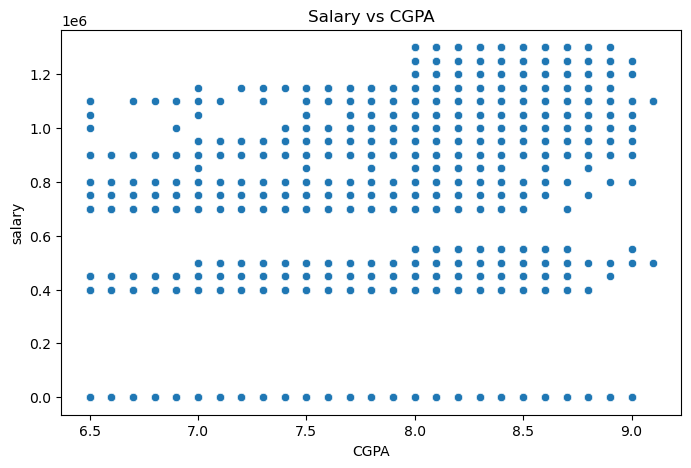

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='CGPA', y='salary', data=df)
plt.title("Salary vs CGPA")
plt.show()

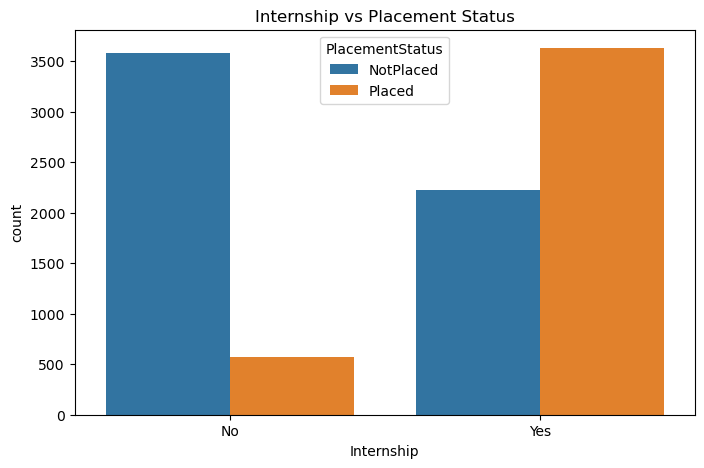

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Internship', hue='PlacementStatus', data=df)
plt.title("Internship vs Placement Status")
plt.show()

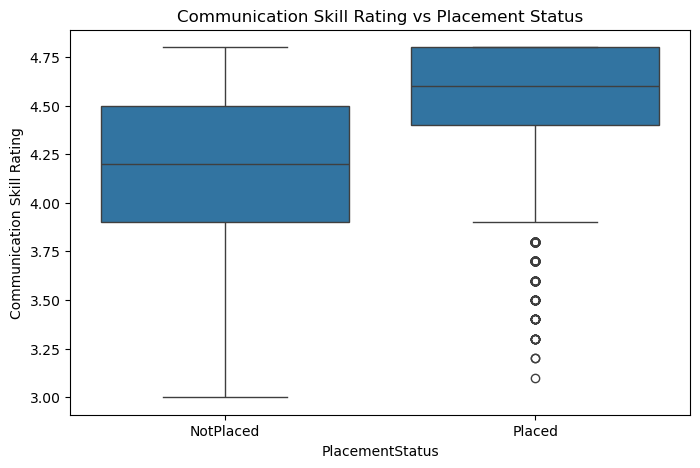

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='PlacementStatus', y='Communication Skill Rating', data=df)
plt.title("Communication Skill Rating vs Placement Status")
plt.show()

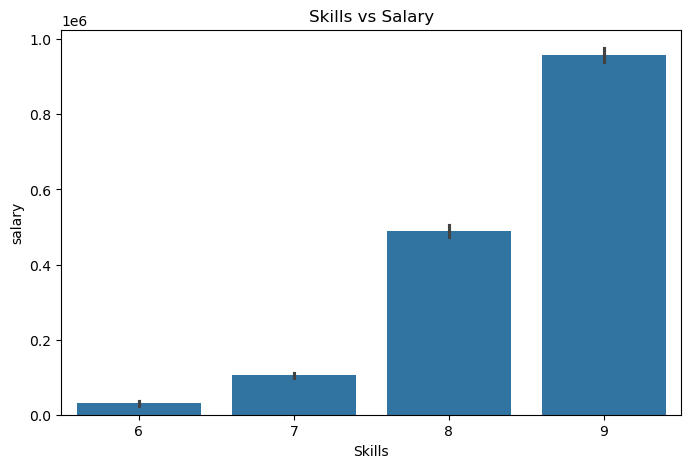

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Skills', y='salary', data=df)
plt.title("Skills vs Salary")
plt.show()

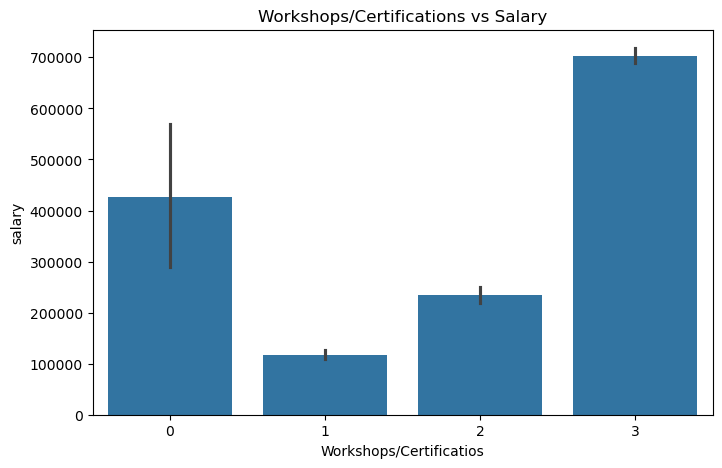

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='Workshops/Certificatios', y='salary', data=df)
plt.title("Workshops/Certifications vs Salary")
plt.show()

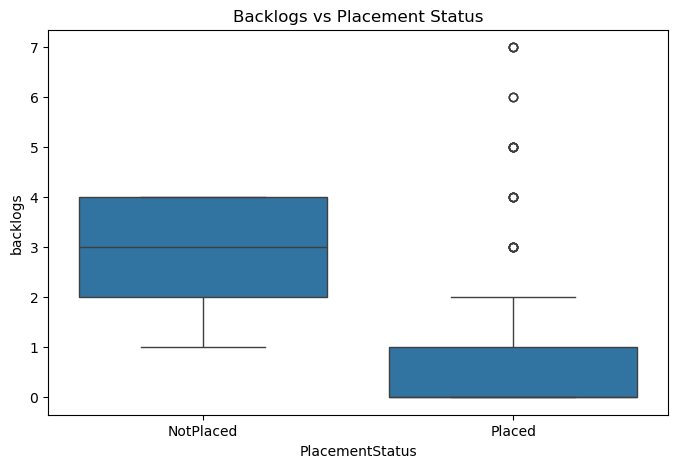

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='PlacementStatus', y='backlogs', data=df)
plt.title("Backlogs vs Placement Status")
plt.show()

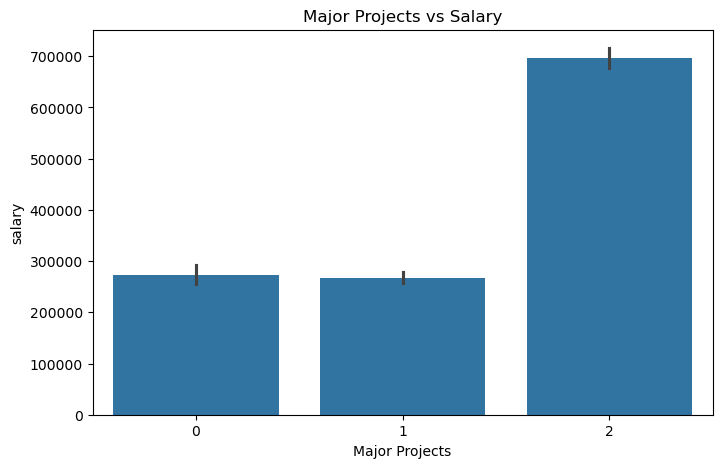

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Major Projects', y='salary', data=df)
plt.title("Major Projects vs Salary")
plt.show()


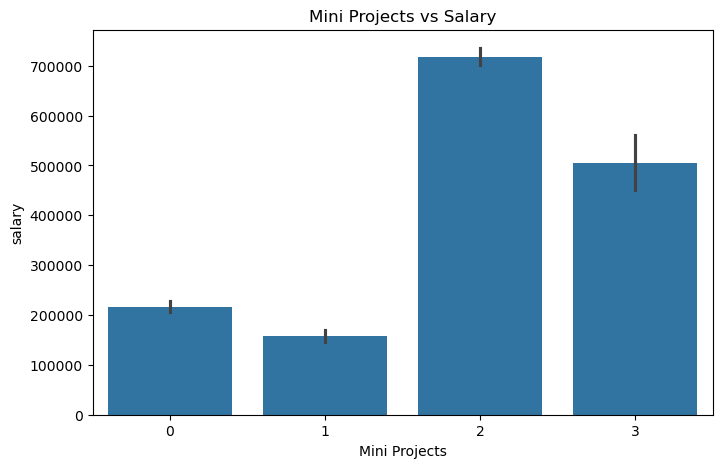

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Mini Projects', y='salary', data=df)
plt.title("Mini Projects vs Salary")
plt.show()

In [22]:
le = LabelEncoder()
df['Internship'] = le.fit_transform(df['Internship'])  # Yes=1, No=0
df['Hackathon'] = le.fit_transform(df['Hackathon'])    # Yes=1, No=0
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])  # Placed=1, NotPlaced=0

In [23]:
# Features and target for salary prediction
X_salary = df.drop(['salary'], axis=1)
y_salary = df['salary']

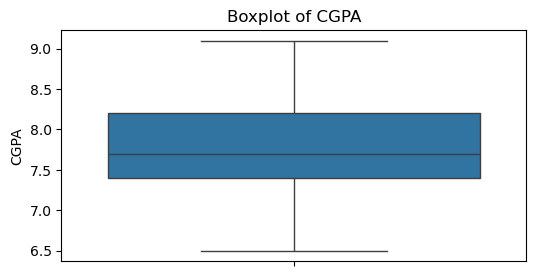

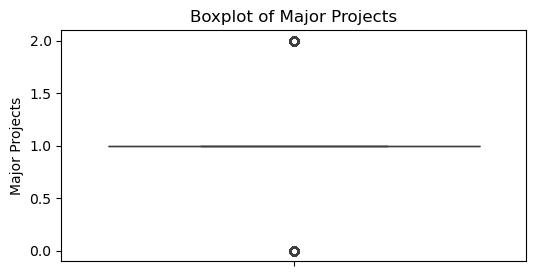

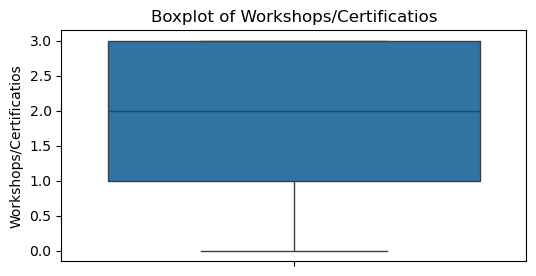

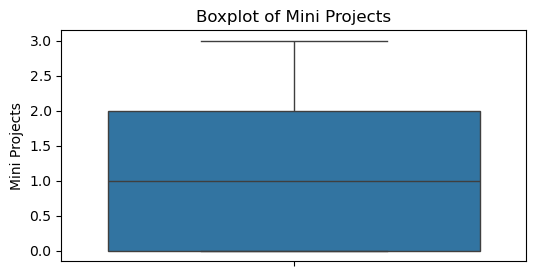

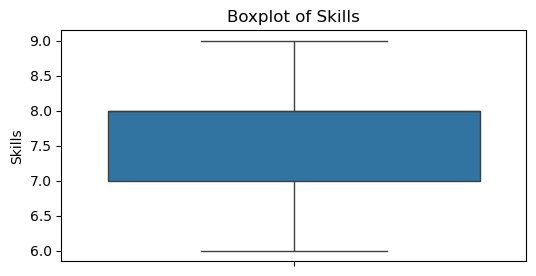

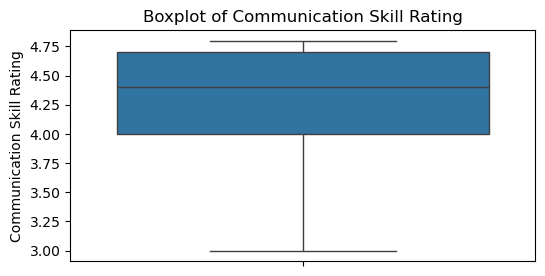

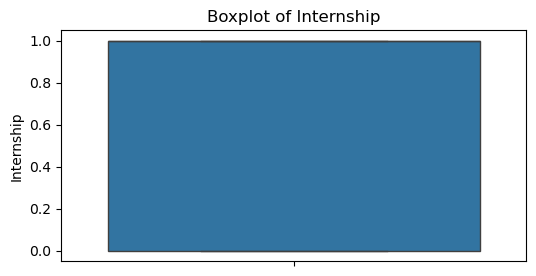

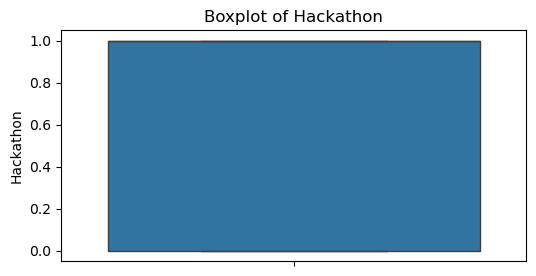

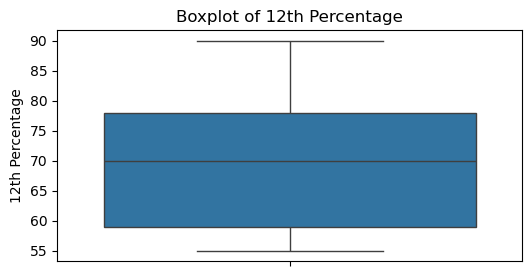

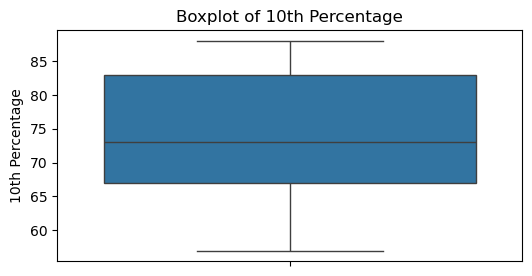

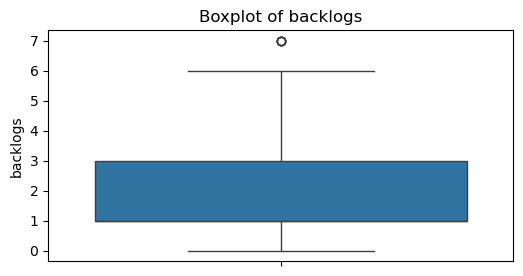

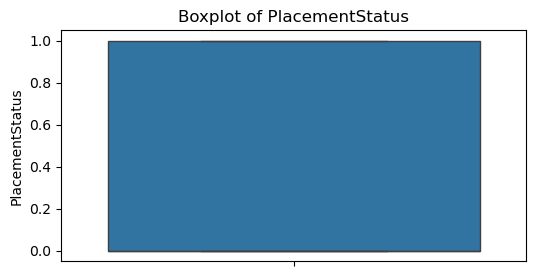

In [24]:
numeric_columns = X_salary.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(y=X_salary[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
for col in X_salary.select_dtypes(include='number').columns:
    Q1 = X_salary[col].quantile(0.25)
    Q3 = X_salary[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X_salary[col] >= lower_bound) & (X_salary[col] <= upper_bound)
    X_salary = X_salary[mask]
    y_salary = y_salary[mask]

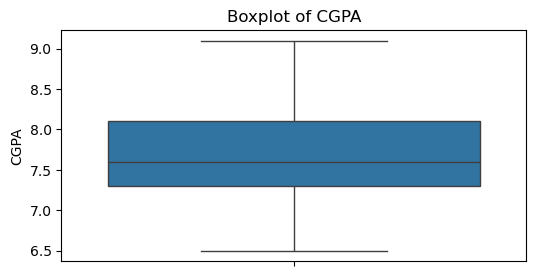

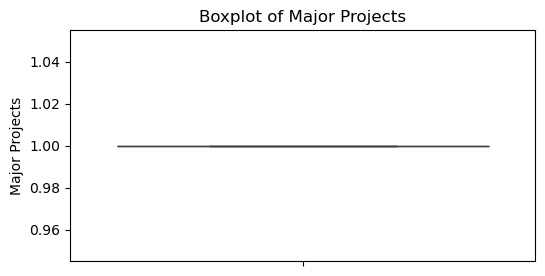

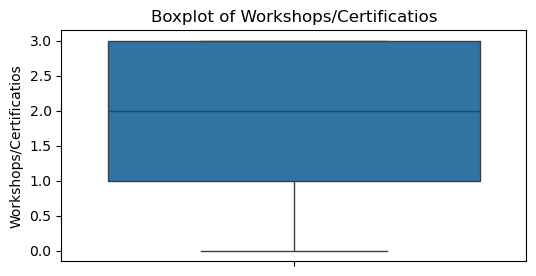

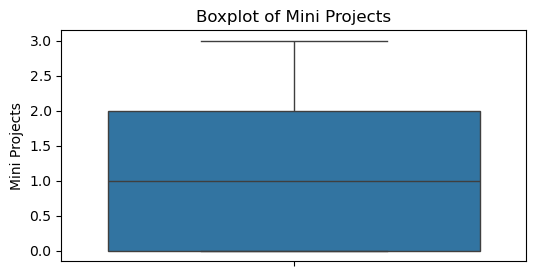

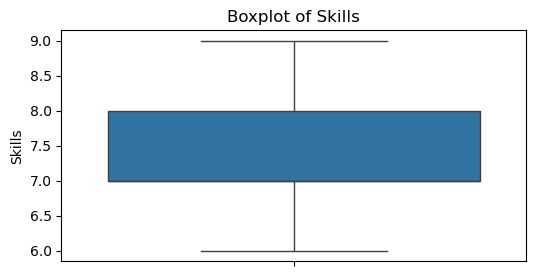

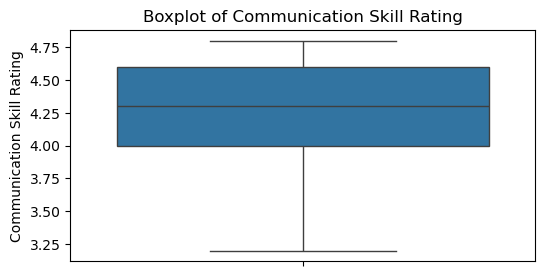

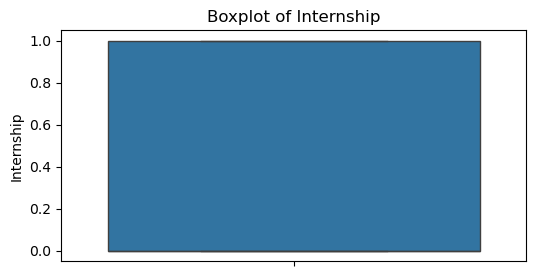

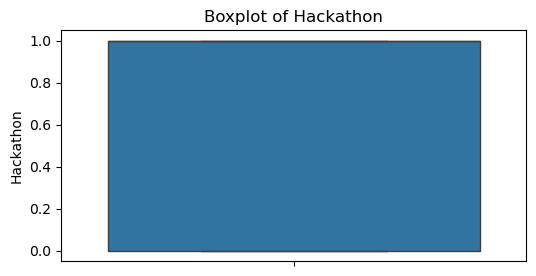

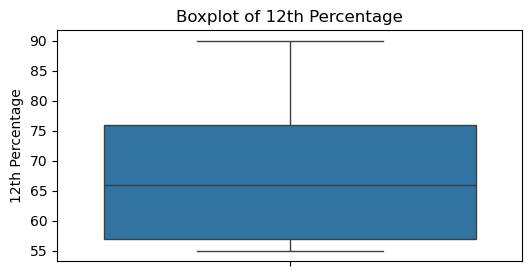

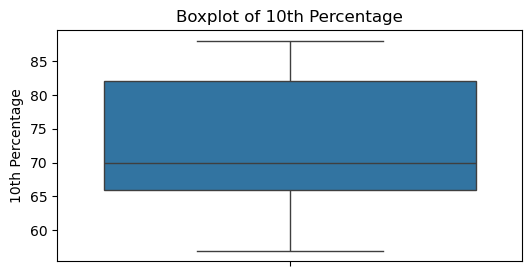

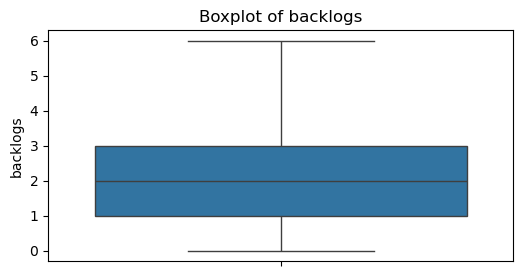

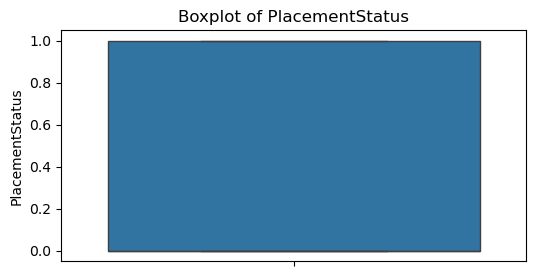

In [26]:
numeric_columns = X_salary.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(y=X_salary[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [27]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

In [28]:
salary_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

In [29]:
# Evaluate salary models
for name, model in salary_models.items():
    model.fit(X_train_s, y_train_s)  # Train the model with training data
    y_pred = model.predict(X_test_s)  # Predict using test data
    
    # Print evaluation metrics
    print(f"\nSalary Prediction Model: {name}")
    print(f"R^2 Score: {r2_score(y_test_s, y_pred):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_s, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test_s, y_pred, squared=False):.2f}")


Salary Prediction Model: Linear Regression
R^2 Score: 0.8952
Mean Absolute Error (MAE): 102034.64
Root Mean Squared Error (RMSE): 135892.28

Salary Prediction Model: Random Forest
R^2 Score: 0.9893
Mean Absolute Error (MAE): 20774.82
Root Mean Squared Error (RMSE): 43515.29

Salary Prediction Model: XGBoost
R^2 Score: 0.9868
Mean Absolute Error (MAE): 24526.40
Root Mean Squared Error (RMSE): 48237.55


In [30]:
X_place = df.drop(['PlacementStatus', 'salary'], axis=1)
y_place = df['PlacementStatus']

In [31]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_place, y_place, test_size=0.2, random_state=42)

In [32]:
placement_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


Placement Prediction Model: Logistic Regression
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1172
           1       0.88      0.93      0.91       828

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



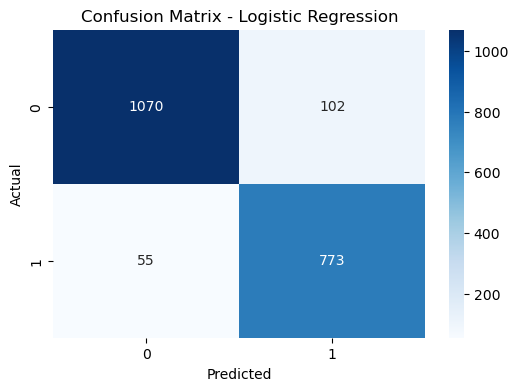


Placement Prediction Model: Random Forest Classifier
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1172
           1       0.92      0.93      0.92       828

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



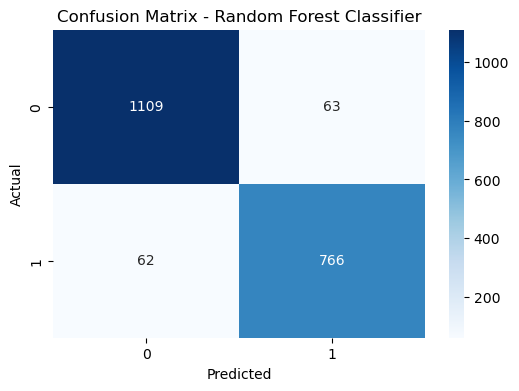


Placement Prediction Model: XGBoost Classifier
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1172
           1       0.92      0.92      0.92       828

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



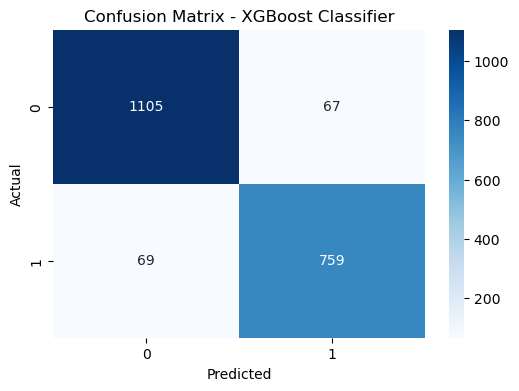

In [33]:
for name, model in placement_models.items():
    model.fit(X_train_p, y_train_p)
    y_pred = model.predict(X_test_p)
    print(f"\nPlacement Prediction Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test_p, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_test_p, y_pred))
    cm = confusion_matrix(y_test_p, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()